In [1]:
! pip install nltk
! pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 3.2 MB/s 
     |████████████████████████████████| 110 kB 50.4 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')
import plotly.express as px
import contractions
import plotly.graph_objects as go
from google.colab import files

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# reading the database
data = pd.read_csv("./drive/MyDrive/ANLP_Project/race.csv")

In [5]:
data1 = data
gender = data1.query("topic == 'Ethnic culture'")

Bar chart depicting all the groups in bias class Race

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 22806 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 22269 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 20154 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 24503 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26397 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 40092 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26063 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

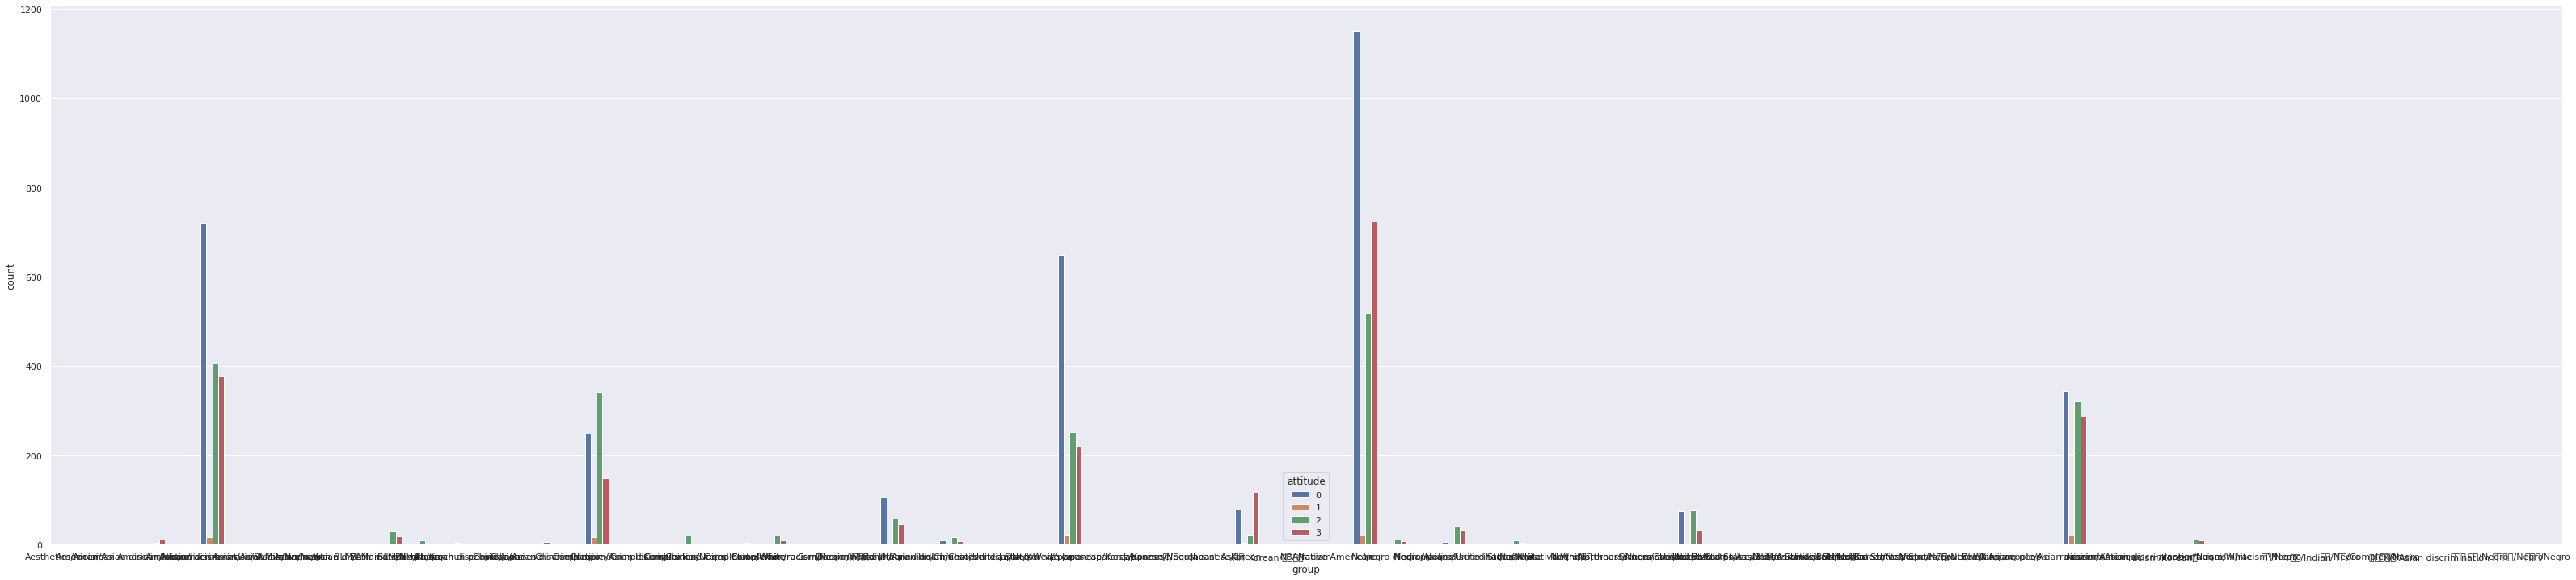

In [11]:
gender1 = gender.groupby(['group', 'attitude']).size().reset_index(name='count')
# gender1.head(100)
sns.barplot(x='group',y='count', data=gender1,
            hue='attitude')
sns.set(rc={'figure.figsize':(55.7,12.27)})
plt.show()

In [7]:
# Stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Radar Chart depicting the 20 most frequent non stop words for Group Japanese

In [8]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return

gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'Japanese'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])

# Removed stop words
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 128, 128, 0.6)',
      fill='toself',
      marker = dict(color = 'blue'),
      name='Group Japanese'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Race_a.html")
# files.download("Race_a.html")


<ipython-input-8-7fac135140c9>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
<ipython-input-8-7fac135140c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
<ipython-input-8-7fac135140c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender2["q"] = gender2["q"].str.strip()
<ipython-input-8-7fac135140c9>:14: SettingWithCopyWarning: 
A

Radar Chart depicting the 20 most frequent non stop words for Group Negro

In [9]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return

gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'Negro'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])
# Removed stop words
stopwords.append('view')
stopwords.append('tell')
stopwords.append('way')
stopwords.append('men')
stopwords.append('man')
stopwords.append('mans')
stopwords.append('women')
stopwords.append('womens')
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 220, 0, 0.6)',
      fill='toself',
      marker = dict(color = 'blue'),
      name='Group Negro'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Race_b.html")
# files.download("Race_b.html")

<ipython-input-9-b18d33956ea4>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-9-b18d33956ea4>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-b18d33956ea4>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-b18d33956ea4>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Radar Chart depicting the 20 most frequent non stop words for Group Asian Descrimination

In [10]:
genderDict = {}

def count(w):
  if w not in genderDict:
    genderDict[w] = 1
  else:
    genderDict[w] += 1
  return

gender2 = gender.query("attitude == 3")
gender2 = gender.query("group == 'Asian discrimination'")
gender2["q"] = gender2["q"].str.replace('[^a-zA-Z -]', '')
gender2["q"] = gender2["q"].str.strip()
gender2["q"] = gender2["q"].apply(lambda x: [contractions.fix(word) for word in x.split()])
# Removed stop words
gender2["q"] = gender2["q"].apply(lambda x: [word for word in x if word not in (stopwords)])
gender3 = gender2["q"].apply(lambda sent: [count(w) for w in sent])
genderDict = sorted(genderDict, reverse=True)
# print(genderDict[:20])
ind = 0
li = list()
def getC(s, w, li):
  for w1 in s:
    if w in w1:
      if len(li) is ind+1:
        li[ind] += 1
      else:
        li.append(1)
  return

for w1 in genderDict[:20]:
  gender4 = gender2["q"].apply(lambda sent: getC(sent, w1, li))
  if len(li) is not ind+1:
    li.append(0)
  ind += 1

df = pd.DataFrame(dict(
    r=li,
    theta=genderDict[:20]))
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=li,
      theta=genderDict[:20],
      fillcolor='rgba(0, 169, 20, 0.6)',
      fill='toself',
      marker = dict(color = 'blue'),
      name='Group Asian'
))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
    )
)
# go.Figure.write_html(fig,"Race_c.html")
# files.download("Race_c.html")

<ipython-input-10-3a680273a907>:12: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-10-3a680273a907>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-3a680273a907>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-3a680273a907>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen